# CIFAR10 CNN Classification

注意：このノートブックはGPUの有無に関わらずPython 3.x および　TensorFlow 2.x（ないしTensorFlow 1.x） にて、オフラインにて稼動するよう変更しています。<br>
Google Colab環境にてオンラインで実行する場合、オリジナルサイトのコードを使って下さい。<br>
2020/02/04: By H.Nishiyama<br>
2021/11/23 追加・変更部分のみ日本語化<br>

このノートブックはTensorFlow 2.x (ないし1.x）を使います<br>
*もし、オンラインのCloabシステムを使うなら、オリジナルサイトのコードを使うか、セルを指示通りに修正して下さい。<br>
【オリジナルサイト】https://github.com/enakai00/colab_tfbook

In [1]:
###%tensorflow_version 2.x

#### [CCC-01]
Import modules and set a random seed.

In [2]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

np.random.seed(20190610)

#--- For TensorFlow 1.x, use the following line, but if you use TensorFlow2.x, you need to comment it out..
###tf.random.set_random_seed(20190610)
#--- For TensorFlow 2.x, use following line, instead of upper line.
tf.random.set_seed(20190610)


#### [CCC-02]
Download the CIFAR10 dataset and store into NumPy arrays.<br>
*Note: Downloading may take time depending on the communication environment.

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

#### [CCC-03]
Show sample images for each category.

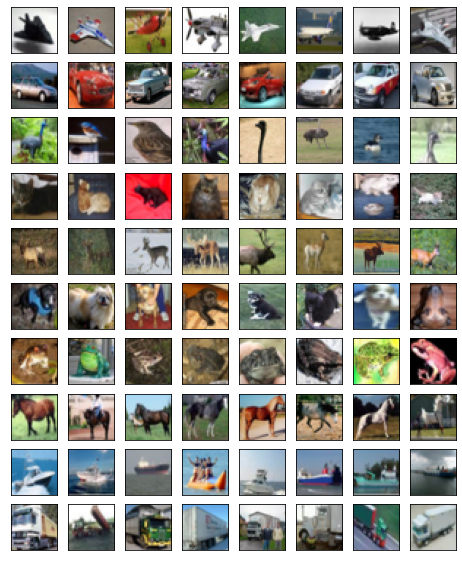

In [4]:
fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            c += 1
            subplot = fig.add_subplot(10, 8, c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.imshow(train_images[j])
            if c % 8 == 0:
                break

#### [CCC-04]
Define the image data generator.

In [5]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    channel_shift_range=0.2)

#### [CCC-05]
Show some generated images for each category.

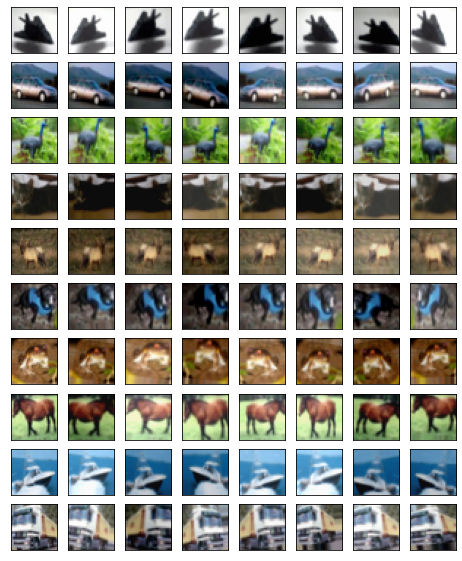

In [6]:
fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            break
    c += 1
    subplot = fig.add_subplot(10, 8, c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(train_images[j])

    for _ in range(7):
        img = datagen.flow(np.array([train_images[j]]), batch_size=1)[0][0]
        c += 1
        subplot = fig.add_subplot(10, 8, c)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(img)

#### [CCC-06]
Define a CNN model.

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        input_shape=(32, 32, 3),
                        name='conv_filter1-1'))
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter1-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Dropout(rate=0.25, name='dropout1'))

model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-1'))
model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Dropout(rate=0.25, name='dropout2'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout3'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_filter1-1 (Conv2D)      (None, 32, 32, 32)        896       
_________________________________________________________________
conv_filter1-2 (Conv2D)      (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
dropout1 (Dropout)           (None, 16, 16, 32)        0         
_________________________________________________________________
conv_filter2-1 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
conv_filter2-2 (Conv2D)      (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 8, 8, 64)          0

#### [CCC-07]
Compile the model using the Adam optimizer, and the cross entroy as a loss function.

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

#### [CCC-08]
Train the model. It achieves the 82% accuracy.<br>
*Note: It takes more than 50 minutes without GPU.

In [9]:
batch_size = 64
history = model.fit_generator(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=(test_images, test_labels),
    steps_per_epoch=len(train_images) / batch_size,
    epochs=20)

E:\dpl39TF26\.venv\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
781/781 [==============================] - 35s 40ms/step - loss: 1.7418 - acc: 0.3617 - val_loss: 1.3647 - val_acc: 0.5030
Epoch 2/20
781/781 [==============================] - 31s 40ms/step - loss: 1.4145 - acc: 0.4877 - val_loss: 1.1305 - val_acc: 0.5860
Epoch 3/20
781/781 [==============================] - 31s 39ms/step - loss: 1.2586 - acc: 0.5511 - val_loss: 1.0195 - val_acc: 0.6353
Epoch 4/20
781/781 [==============================] - 31s 40ms/step - loss: 1.1752 - acc: 0.5842 - val_loss: 0.9803 - val_acc: 0.6535
Epoch 5/20
781/781 [==============================] - 31s 40ms/step - loss: 1.1057 - acc: 0.6109 - val_loss: 0.9048 - val_acc: 0.6816
Epoch 6/20
781/781 [==============================] - 31s 40ms/step - loss: 1.0689 - acc: 0.6228 - val_loss: 0.8715 - val_acc: 0.6937
Epoch 7/20
781/781 [==============================] - 31s 40ms/step - loss: 1.0215 - acc: 0.6433 - val_loss: 0.8632 - val_acc: 0.6950
Epoch 8/20
781/781 [==============================] - 31s 40ms

#### [CCC-09]
Plot chars for accuracy and loss values.

<AxesSubplot:>

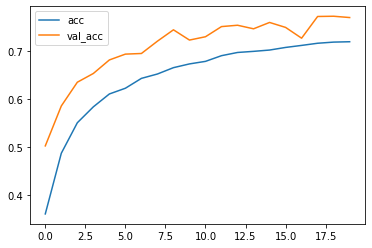

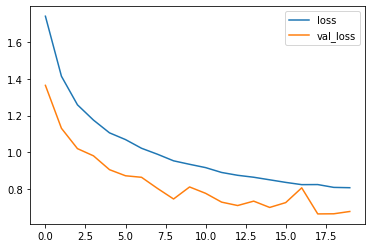

In [10]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()